170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 57s 0us/step


D:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.2925 - loss: 2.2411 - val_accuracy: 0.3761 - val_loss: 1.8813
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.4537 - loss: 1.5144 - val_accuracy: 0.4889 - val_loss: 1.4214
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.5023 - loss: 1.3897 - val_accuracy: 0.5702 - val_loss: 1.1923
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.5269 - loss: 1.3285 - val_accuracy: 0.5519 - val_loss: 1.2965
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.5482 - loss: 1.2658 - val_accuracy: 0.6187 - val_loss: 1.0816
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.5606 - loss: 1.2269 - val_accuracy: 0.5300 - val_loss: 1.3650
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.5768 - loss: 1.1920 - val_accuracy: 0.6466 - val_loss: 1.0072
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.5859 - loss: 1.1762 - 

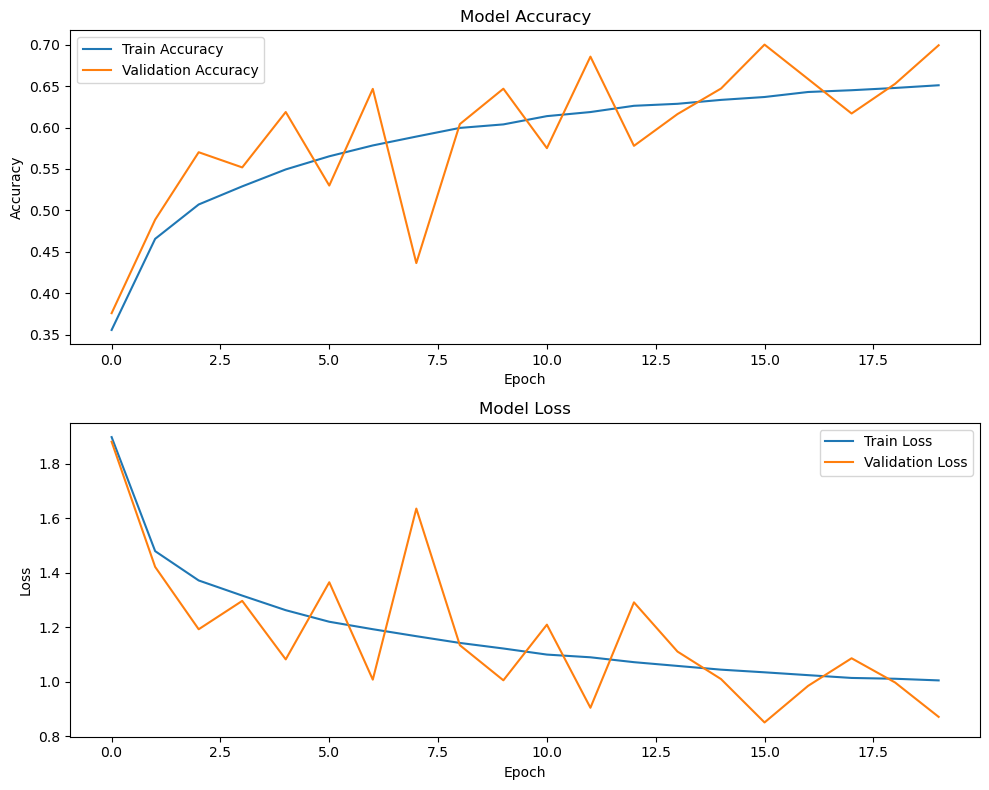

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7034 - loss: 0.8589
Final Test Accuracy: 0.6992


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# Load and preprocess dataset (CIFAR-10 for demonstration)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical format
y_train, y_test = keras.utils.to_categorical(y_train, 10), keras.utils.to_categorical(y_test, 10)

# Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# Build CNN Model
def build_model():
    model = models.Sequential([
        data_augmentation,
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.25),
        
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile Model
model = build_model()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))

# Plot Accuracy & Loss
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Accuracy Graph
axs[0].plot(history.history['accuracy'], label='Train Accuracy')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Model Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend()

# Loss Graph
axs[1].plot(history.history['loss'], label='Train Loss')
axs[1].plot(history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Model Loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend()

plt.tight_layout()
plt.show()

# Evaluate Model
final_loss, final_acc = model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {final_acc:.4f}")